In [89]:
import numpy as np
import math
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
from sklearn.metrics import confusion_matrix
import librosa
import matplotlib.pylab as plt
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


In [51]:
# Cargar los datos
train_data = pd.read_csv('./data-vectors/train/train.csv')
train_labels = pd.read_csv('./train_labels.csv')
test_labels = pd.read_csv('./test_labels.csv')

# Extraer los nombres de archivo (idx) de los conjuntos de entrenamiento y prueba
train_filenames = train_labels['idx'].astype(str).apply(lambda x: x + '.wav')
test_filenames = test_labels['idx'].astype(str).apply(lambda x: x + '.wav')

# Filtrar train_data para obtener los subconjuntos de entrenamiento y prueba
train_set = train_data[train_data['filename'].isin(train_filenames)]
test_set = train_data[train_data['filename'].isin(test_filenames)]


In [53]:
train_set.loc[:, 'class'] = train_set['class'].map({'RightWhale': 1, 'NoWhale': -1})
test_set.loc[:, 'class'] = test_set['class'].map({'RightWhale': 1, 'NoWhale': -1})


X_train = train_set.drop(columns=['filename', 'class'])
y_train = train_set['class']

X_test = test_set.drop(columns=['filename', 'class'])
y_test = test_set['class']


In [54]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()


In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:

def h(X, w, b):
    return np.dot(X, w.T) + b

def loss(y, y_aprox, C, W):
    termino_regularizacion = 0.5 * np.linalg.norm(W)**2
    termino_perdida = C * np.sum(np.maximum(0, 1 - y * y_aprox))
    costo_total = termino_regularizacion + termino_perdida
    return costo_total

def derivatives(x, y, y_aprox, w, b, C):
    F = y * y_aprox
    dL_dw = np.zeros_like(w)
    dL_db = 0
    condition = F < 1
    if np.any(condition):
        dL_dw = w + C * np.sum(-y[condition][:, np.newaxis] * x[condition], axis=0)
        dL_db = C * np.sum(-y[condition])
    else:
        dL_dw = w
    return dL_dw, dL_db

def Update(y, y_aprox, w, b, db, dw, alpha, C):
    w = w - alpha * dw
    b = b - alpha * db
    return w, b

def training(X, Y, C, alpha, epochs):
    w = np.random.rand(X.shape[1])
    b = np.random.rand()
    error = []
    for i in range(epochs):
        Y_aprox = h(X, w, b)
        dw, db = derivatives(X, Y, Y_aprox, w, b, C)
        w, b = Update(Y, Y_aprox, w, b, db, dw, alpha, C)
        L = loss(Y, Y_aprox, C, w)
        error.append(L)
    return w, b, error

def testing(X, w, b):
    y_aprox = h(X, w, b)
    return np.sign(y_aprox)

Accuracy at 10 epochs: 27.43%
Accuracy at 20 epochs: 74.67%
Accuracy at 30 epochs: 74.58%
Accuracy at 40 epochs: 74.67%
Accuracy at 50 epochs: 75.26%
Accuracy at 60 epochs: 74.49%
Accuracy at 70 epochs: 74.58%
Accuracy at 80 epochs: 71.47%
Accuracy at 90 epochs: 75.08%
Accuracy at 100 epochs: 74.49%


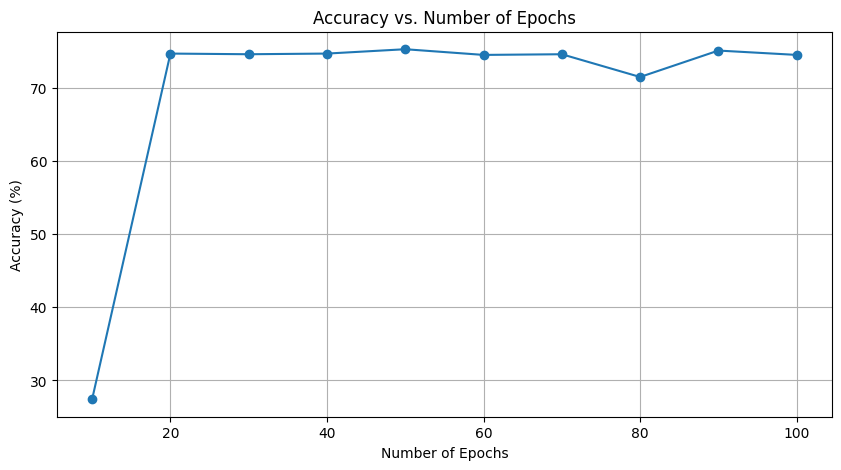

In [79]:
# Parámetros para el entrenamiento
C = 1.0
alpha = 0.001
epochs = 100

accuracies = []
epoch_checkpoints = []

# Bucle de entrenamiento, capturando la precisión cada 10 épocas
for epoch in range(10, epochs + 1, 10):
    w, b, _ = training(X_train, y_train, C, alpha, epoch)
    y_pred = testing(X_test, w, b)
    accuracy = (y_test == y_pred).mean() * 100
    accuracies.append(accuracy)
    epoch_checkpoints.append(epoch)
    print(f"Accuracy at {epoch} epochs: {accuracy:.2f}%")

# Graficar la precisión vs. número de épocas
plt.figure(figsize=(10, 5))
plt.plot(epoch_checkpoints, accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Epochs')
plt.grid(True)
plt.show()

In [85]:
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

In [81]:
accuracy = (y_test== y_pred).mean() * 100
print(f"El accuracy es: {accuracy:.2f}%")

El accuracy es: 74.49%


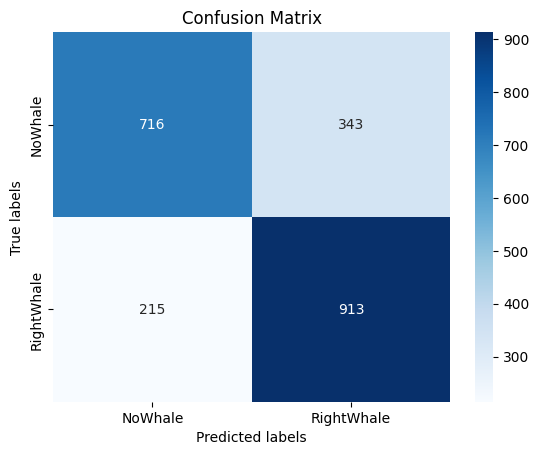

In [90]:
cm = confusion_matrix(y_test, y_pred)

categories = ['NoWhale', 'RightWhale']

# Graficar la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=categories,   # Etiquetas para las predicciones (eje X)
            yticklabels=categories)   # Etiquetas para los valores reales (eje Y)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [91]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)  

results = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'ROC-AUC'],
    'Value': [precision, recall, f1, roc_auc]
})

print(results)

      Metric     Value
0  Precision  0.726911
1     Recall  0.809397
2   F1 Score  0.765940
3    ROC-AUC  0.742753
